In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d import Axes3D
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, Matern
from sklearn.multioutput import MultiOutputRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
import threading
import sys
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, RationalQuadratic, DotProduct, ExpSineSquared
from sklearn.preprocessing import StandardScaler
import time
from matplotlib import rcParams
rcParams['font.family'] = "Cambria"

Load in Data

In [2]:
#Original Data
df_train = pd.read_csv('train_data_umap.csv')
df_val = pd.read_csv('val_data_umap.csv')
df_test = pd.read_csv('test_data_umap.csv')
Data = pd.concat([df_train, df_val, df_test])
Data

,Comp,BID,rg_mean,rg_var,asph_mean,asph_var,acyl_mean,acyl_var,anis_mean,anis_var,UMAP_0,UMAP_1
0,0.10,0.8,16.166546,6.812754,148.275013,4833.582021,64.320593,744.936117,0.330548,0.007616,10.516668,3.984322
1,0.10,0.4,13.612773,1.396287,96.157465,656.101435,43.660001,93.384363,0.310703,0.002313,9.912952,3.224421
2,0.10,0.8,14.083670,2.844394,100.203840,1352.621823,45.013396,238.054771,0.282162,0.004743,9.637127,3.047199
3,0.10,0.8,14.959565,9.216134,121.530580,6972.810959,53.546627,918.938677,0.278106,0.016740,11.408154,1.914839
4,0.10,0.2,12.947786,2.694579,83.761185,1253.975279,37.808345,180.261758,0.276359,0.007354,11.795531,2.090026
...,...,...,...,...,...,...,...,...,...,...,...,...
43,0.10,0.8,16.717541,11.704988,175.321273,9903.234984,72.994625,1275.757068,0.363009,0.023856,12.689776,3.575943
44,0.80,0.6,7.670281,0.570034,28.752799,161.483362,12.367374,19.563671,0.274201,0.014741,-9.744554,7.804959
45,0.25,0.8,10.677318,2.766465,57.336709,1064.511188,25.399448,142.077560,0.267141,0.015324,9.486568,4.325586
46,0.30,0.6,10.046250,3.680132,53.337774,1082.738885,23.546893,163.582674,0.281643,0.017437,11.851849,4.527645


Data Visualization

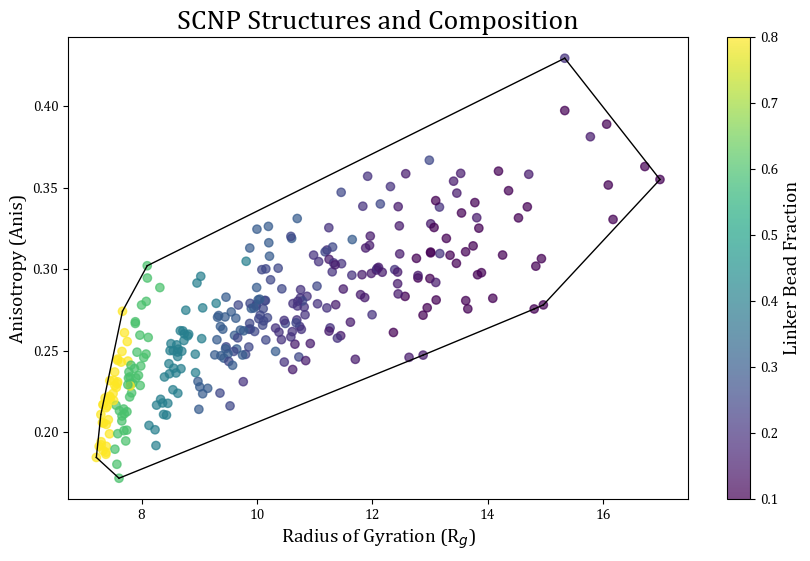

In [3]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Data['rg_mean'], Data['anis_mean'], c=Data['Comp'], cmap='viridis', alpha=0.7)

# Compute and draw Convex Hull
points = np.column_stack((Data['rg_mean'], Data['anis_mean']))  # Create (x, y) pairs
hull = ConvexHull(points)

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=1)  # Draw solid black line

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Linker Bead Fraction', fontsize = 14)

# Labels and title
plt.xlabel(r'Radius of Gyration (R$_g$)', fontsize = 14)
plt.ylabel('Anisotropy (Anis)', fontsize = 14)
plt.title('SCNP Structures and Composition', fontsize = 20)

plt.show()


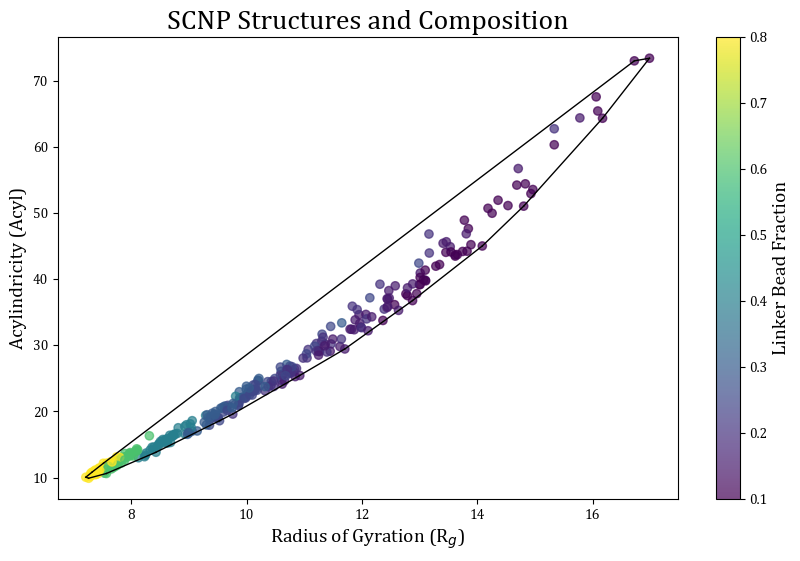

In [4]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Data['rg_mean'], Data['acyl_mean'], c=Data['Comp'], cmap='viridis', alpha=0.7)

# Compute and draw Convex Hull
points = np.column_stack((Data['rg_mean'], Data['acyl_mean']))  # Create (x, y) pairs
hull = ConvexHull(points)

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=1)  # Draw solid black line

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Linker Bead Fraction', fontsize = 14)

# Labels and title
plt.xlabel(r'Radius of Gyration (R$_g$)', fontsize = 14)
plt.ylabel('Acylindricity (Acyl)', fontsize = 14)
plt.title('SCNP Structures and Composition', fontsize = 20)

plt.show()


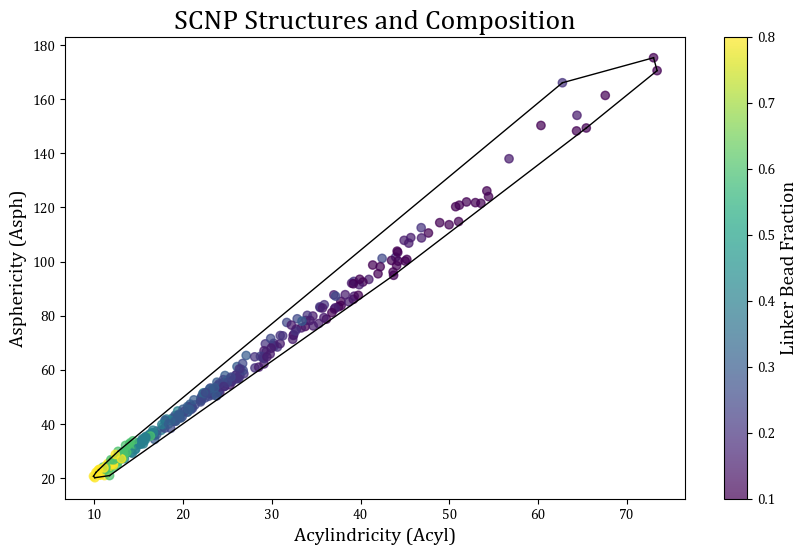

In [5]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Data['acyl_mean'], Data['asph_mean'], c=Data['Comp'], cmap='viridis', alpha=0.7)

# Compute and draw Convex Hull
points = np.column_stack((Data['acyl_mean'], Data['asph_mean']))  # Create (x, y) pairs
hull = ConvexHull(points)

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=1)  # Draw solid black line

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Linker Bead Fraction', fontsize = 14)

# Labels and title
plt.xlabel('Acylindricity (Acyl)', fontsize = 14)
plt.ylabel('Asphericity (Asph)', fontsize = 14)
plt.title('SCNP Structures and Composition', fontsize = 20)

plt.show()


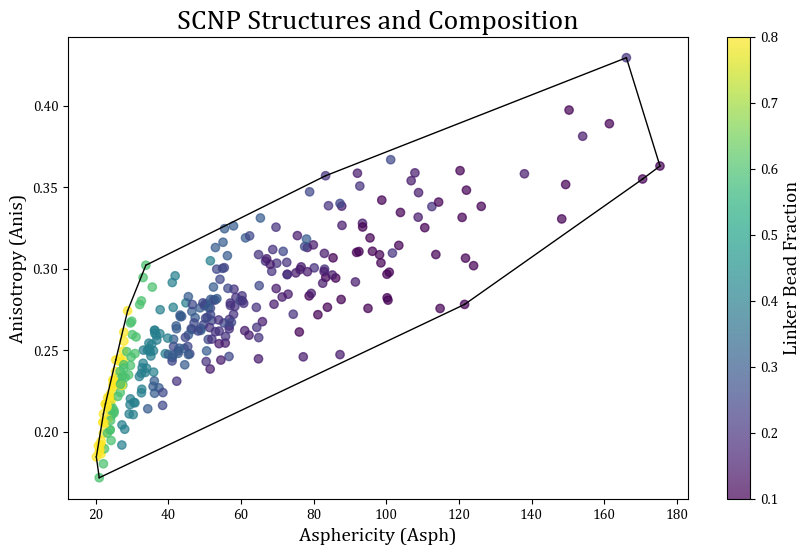

In [6]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Data['asph_mean'], Data['anis_mean'], c=Data['Comp'], cmap='viridis', alpha=0.7)

# Compute and draw Convex Hull
points = np.column_stack((Data['asph_mean'], Data['anis_mean']))  # Create (x, y) pairs
hull = ConvexHull(points)

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=1)  # Draw solid black line

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Linker Bead Fraction', fontsize = 14)

# Labels and title
plt.xlabel('Asphericity (Asph)', fontsize = 14)
plt.ylabel('Anisotropy (Anis)', fontsize = 14)
plt.title('SCNP Structures and Composition', fontsize = 20)

plt.show()


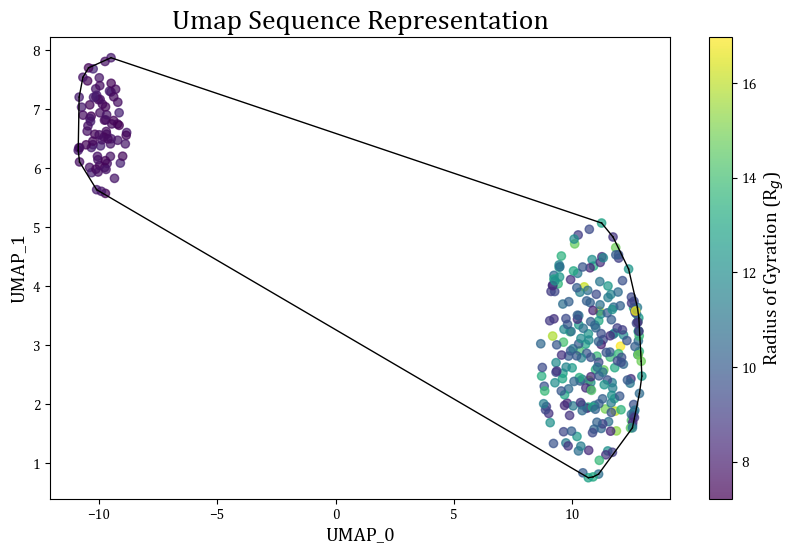

In [7]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Data['UMAP_0'], Data['UMAP_1'], c=Data['rg_mean'], cmap='viridis', alpha=0.7)

# Compute and draw Convex Hull
points = np.column_stack((Data['UMAP_0'], Data['UMAP_1']))  # Create (x, y) pairs
hull = ConvexHull(points)

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=1)  # Draw solid black line

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label(r'Radius of Gyration (R$_g$)', fontsize = 14)

# Labels and title
plt.xlabel('UMAP_0', fontsize = 14)
plt.ylabel('UMAP_1', fontsize = 14)
plt.title('Umap Sequence Representation', fontsize = 20)

plt.show()


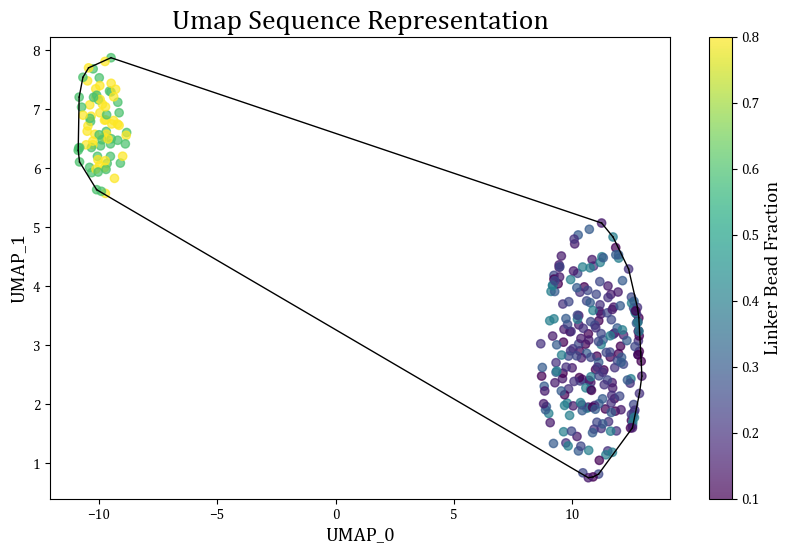

In [8]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Data['UMAP_0'], Data['UMAP_1'], c=Data['Comp'], cmap='viridis', alpha=0.7)

# Compute and draw Convex Hull
points = np.column_stack((Data['UMAP_0'], Data['UMAP_1']))  # Create (x, y) pairs
hull = ConvexHull(points)

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=1)  # Draw solid black line

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label(r'Linker Bead Fraction', fontsize = 14)

# Labels and title
plt.xlabel('UMAP_0', fontsize = 14)
plt.ylabel('UMAP_1', fontsize = 14)
plt.title('Umap Sequence Representation', fontsize = 20)

plt.show()


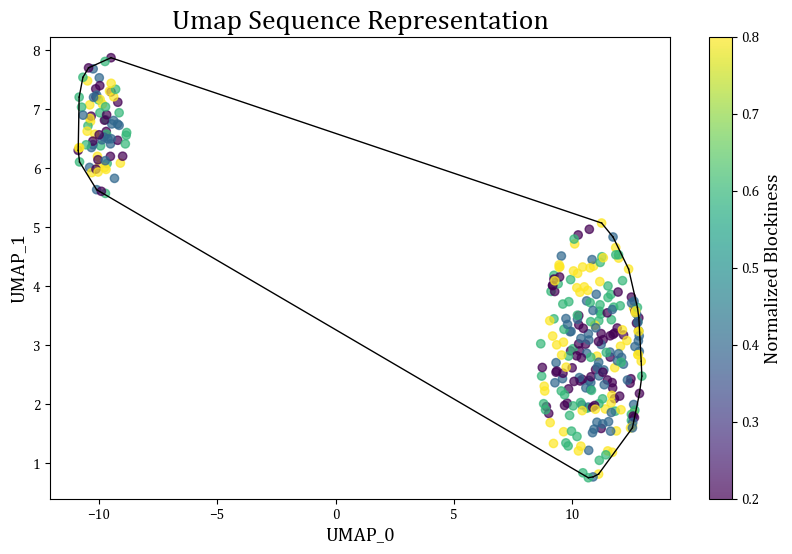

In [9]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Data['UMAP_0'], Data['UMAP_1'], c=Data['BID'], cmap='viridis', alpha=0.7)

# Compute and draw Convex Hull
points = np.column_stack((Data['UMAP_0'], Data['UMAP_1']))  # Create (x, y) pairs
hull = ConvexHull(points)

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=1)  # Draw solid black line

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label(r'Normalized Blockiness', fontsize = 14)

# Labels and title
plt.xlabel('UMAP_0', fontsize = 14)
plt.ylabel('UMAP_1', fontsize = 14)
plt.title('Umap Sequence Representation', fontsize = 20)

plt.show()


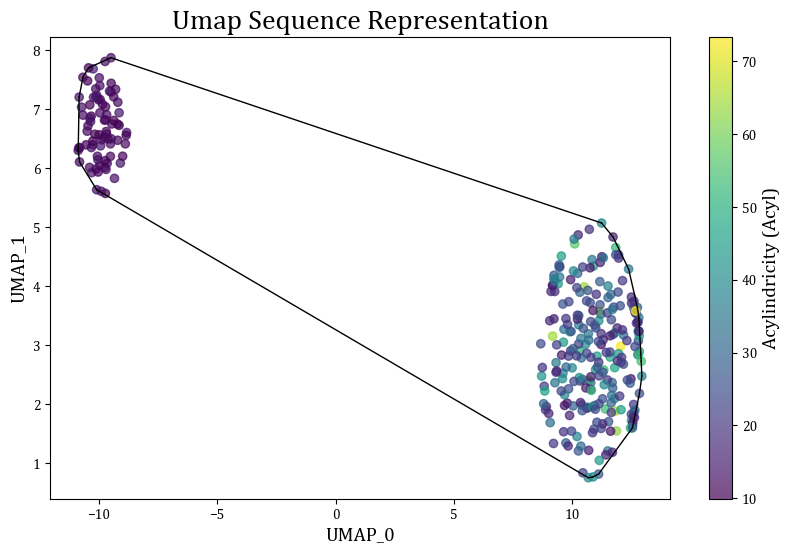

In [10]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Data['UMAP_0'], Data['UMAP_1'], c=Data['acyl_mean'], cmap='viridis', alpha=0.7)

# Compute and draw Convex Hull
points = np.column_stack((Data['UMAP_0'], Data['UMAP_1']))  # Create (x, y) pairs
hull = ConvexHull(points)

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=1)  # Draw solid black line

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label(r'Acylindricity (Acyl)', fontsize = 14)

# Labels and title
plt.xlabel('UMAP_0', fontsize = 14)
plt.ylabel('UMAP_1', fontsize = 14)
plt.title('Umap Sequence Representation', fontsize = 20)

plt.show()


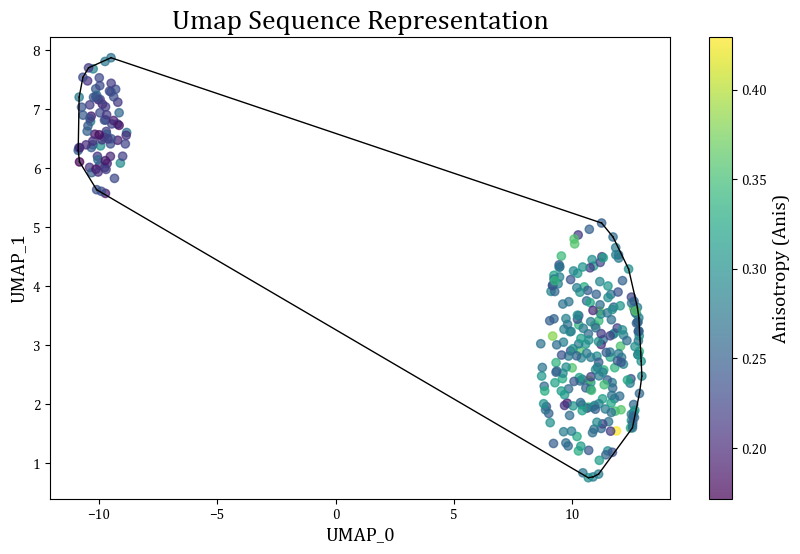

In [11]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Data['UMAP_0'], Data['UMAP_1'], c=Data['anis_mean'], cmap='viridis', alpha=0.7)

# Compute and draw Convex Hull
points = np.column_stack((Data['UMAP_0'], Data['UMAP_1']))  # Create (x, y) pairs
hull = ConvexHull(points)

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=1)  # Draw solid black line

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label(r'Anisotropy (Anis)', fontsize = 14)

# Labels and title
plt.xlabel('UMAP_0', fontsize = 14)
plt.ylabel('UMAP_1', fontsize = 14)
plt.title('Umap Sequence Representation', fontsize = 20)

plt.show()


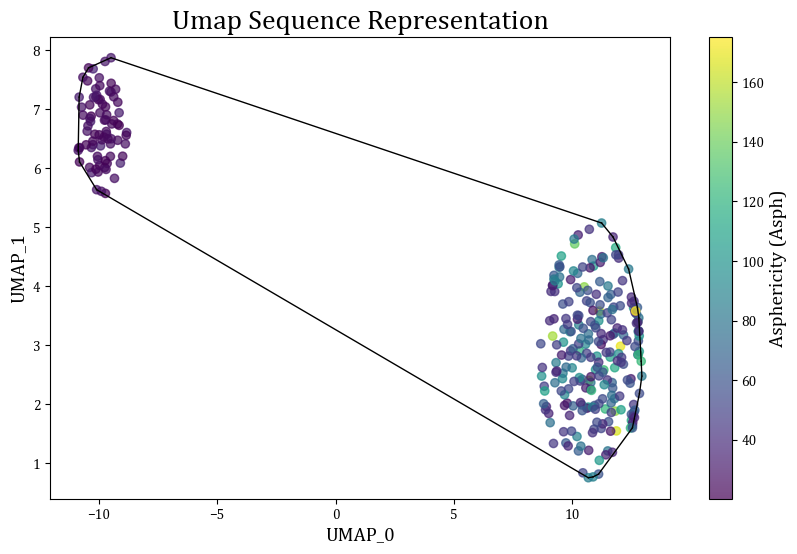

In [12]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Data['UMAP_0'], Data['UMAP_1'], c=Data['asph_mean'], cmap='viridis', alpha=0.7)

# Compute and draw Convex Hull
points = np.column_stack((Data['UMAP_0'], Data['UMAP_1']))  # Create (x, y) pairs
hull = ConvexHull(points)

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=1)  # Draw solid black line

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label(r'Asphericity (Asph)', fontsize = 14)

# Labels and title
plt.xlabel('UMAP_0', fontsize = 14)
plt.ylabel('UMAP_1', fontsize = 14)
plt.title('Umap Sequence Representation', fontsize = 20)

plt.show()


## Prediction Results

Radius of Gyration (Use Matern Kernal with Lengthscale = 1.73333 and nu = 0.25)

In [13]:
# Define the parameter values
length_scale = 1.733333
nu = 0.250000

# ---------- Features ----------
features = ['Comp', 'BID', 'UMAP_0', 'UMAP_1']
X_train = df_train[features]
X_val = df_val[features]

# ---------- Scaling ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# ---------- Targets ----------
target = "rg_mean"
y_train = df_train[target].values
y_val = df_val[target].values

# Store results
results = []

# Kernel definition
kernel = Matern(length_scale=length_scale, nu=nu, length_scale_bounds=(1e-3, 1e3))
gpr_rg = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=20)

gpr_rg.fit(X_train_scaled, y_train)
y_pred_val = gpr_rg.predict(X_val_scaled)
mse = mean_squared_error(y_val, y_pred_val)

results.append({
    "Length_scale": length_scale,
    "Nu": nu,
    "MSE": mse
})
print(gpr_rg.kernel_)
# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


c:\Users\pt3594\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Matern(length_scale=3.64, nu=0.25)
   Length_scale    Nu       MSE
0      1.733333  0.25  0.374393


c:\Users\pt3594\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


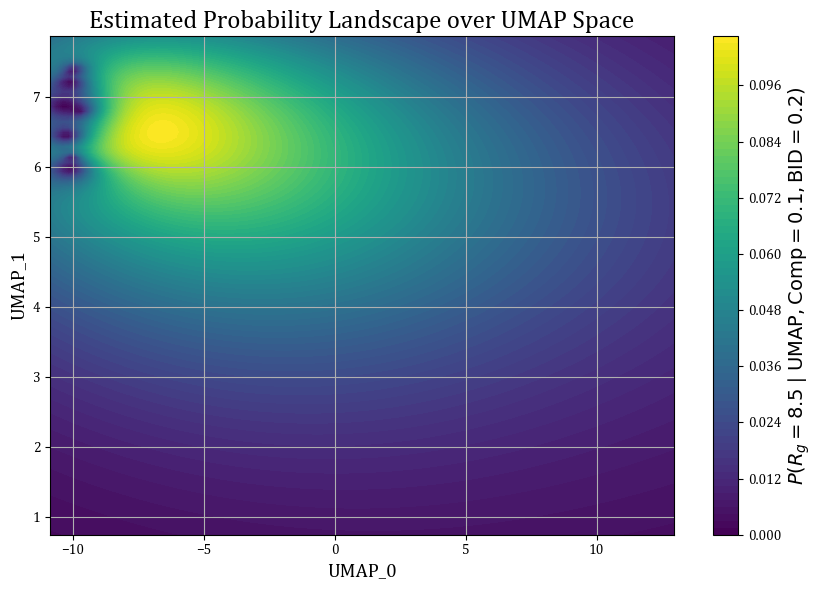

In [14]:
from scipy.stats import norm

# Grid over UMAP space
umap0_vals = np.linspace(Data['UMAP_0'].min(), Data['UMAP_0'].max(), 100)
umap1_vals = np.linspace(Data['UMAP_1'].min(), Data['UMAP_1'].max(), 100)
U0, U1 = np.meshgrid(umap0_vals, umap1_vals)

# Flatten for prediction
U0_flat = U0.ravel()
U1_flat = U1.ravel()

# Fixed Comp and BID
comp = 0.8
bid = 0.2

# Input matrix: shape (n_points, 4)
X_grid = np.column_stack([np.full_like(U0_flat, comp),
                          np.full_like(U0_flat, bid),
                          U0_flat,
                          U1_flat])

# Scale features
X_grid_scaled = scaler.transform(X_grid)

# Predict using trained model
rg_pred, rg_std = gpr_rg.predict(X_grid_scaled, return_std=True)

# Compute probability density for Rg = 8
p_rg10 = norm.pdf(8.5, loc=rg_pred, scale=rg_std)

# Reshape back to grid
P_grid = p_rg10.reshape(U0.shape)

# ---------- Plot ----------
plt.figure(figsize=(8.5, 6))
contour = plt.contourf(U0, U1, P_grid, levels=100, cmap='viridis')
cbar = plt.colorbar(contour)
cbar.set_label(r"$P(R_g = 8.5 \mid \mathrm{UMAP}, \mathrm{Comp}=0.1, \mathrm{BID}=0.2)$", fontsize=14)

plt.xlabel("UMAP_0", fontsize=14)
plt.ylabel("UMAP_1", fontsize=14)
plt.title("Estimated Probability Landscape over UMAP Space", fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()


Predicted the correct U_MAP locations for Rg given BID and Comp

c:\Users\pt3594\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


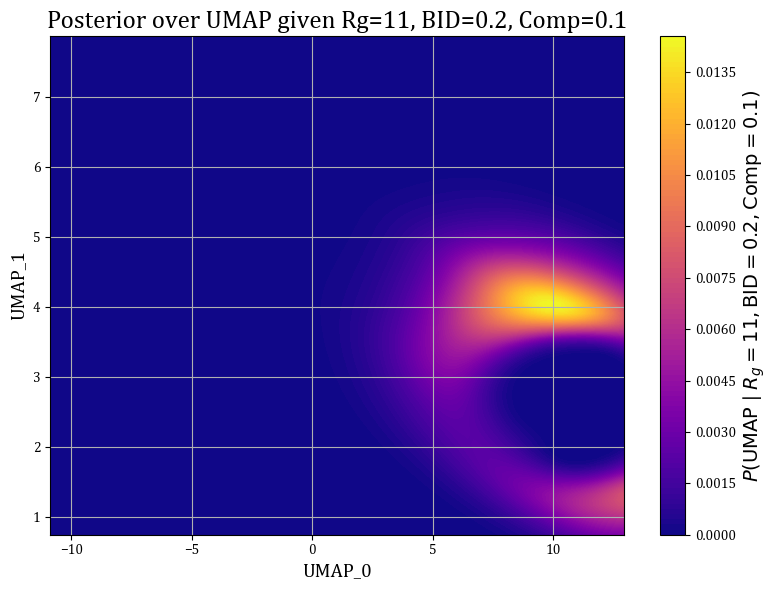

In [15]:
from scipy.stats import norm, gaussian_kde

# Estimate P(UMAP) from data
umap_data = Data[['UMAP_0', 'UMAP_1']].values.T  # shape (2, N)
kde = gaussian_kde(umap_data)

# Grid over UMAP space
umap0_vals = np.linspace(Data['UMAP_0'].min(), Data['UMAP_0'].max(), 100)
umap1_vals = np.linspace(Data['UMAP_1'].min(), Data['UMAP_1'].max(), 100)
U0, U1 = np.meshgrid(umap0_vals, umap1_vals)
U0_flat = U0.ravel()
U1_flat = U1.ravel()

# Fixed Comp and BID
comp = 0.1
bid = 0.2

# Input matrix for GPR
X_grid = np.column_stack([np.full_like(U0_flat, comp),
                          np.full_like(U0_flat, bid),
                          U0_flat,
                          U1_flat])

# Scale and predict
X_grid_scaled = scaler.transform(X_grid)
rg_pred, rg_std = gpr_rg.predict(X_grid_scaled, return_std=True)

# Compute P(Rg = 11 | ...)
p_rg_given_x = norm.pdf(11, loc=rg_pred, scale=rg_std)

# Estimate P(UMAP) using KDE
umap_pts = np.vstack([U0_flat, U1_flat])  # shape (2, N)
p_umap = kde(umap_pts)

# Apply Bayes' theorem (unnormalized posterior)
posterior = p_rg_given_x * p_umap
posterior_grid = posterior.reshape(U0.shape)

# ---------- Plot ----------
plt.figure(figsize=(8, 6))
contour = plt.contourf(U0, U1, posterior_grid, levels=100, cmap='plasma')
cbar = plt.colorbar(contour)
cbar.set_label(r"$P(\mathrm{UMAP} \mid R_g=11, \mathrm{BID}=0.2, \mathrm{Comp}=0.1)$", fontsize=14)

plt.xlabel("UMAP_0", fontsize=14)
plt.ylabel("UMAP_1", fontsize=14)
plt.title("Posterior over UMAP given Rg=11, BID=0.2, Comp=0.1", fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()


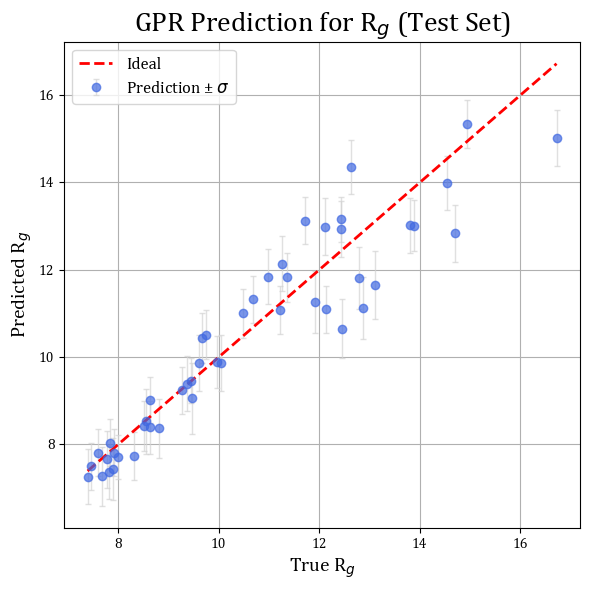

In [16]:
#Apply trained model on Test dataset!
# ---------- Predict with standard deviation ----------
X_test = df_test[features]
X_test_scaled = scaler.transform(X_test)
y_test = df_test[target].values
y_pred_test, y_std_test = gpr_rg.predict(X_test_scaled, return_std=True)

# ---------- Plot with confidence intervals ----------
plt.figure(figsize=(6, 6))
plt.errorbar(
    y_test, y_pred_test, yerr=y_std_test*1.2,
    fmt='o', color='royalblue', ecolor='lightgray', elinewidth=1, capsize=2, alpha=0.7, label=r"Prediction ± $\sigma$"
)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label="Ideal")

plt.xlabel(r"True R$_{g}$", fontsize = 14)
plt.ylabel(r"Predicted R$_{g}$", fontsize = 14)
plt.title(r"GPR Prediction for R$_{g}$ (Test Set)", fontsize = 20)
plt.legend(fontsize =12)
plt.grid(True)
plt.tight_layout()
plt.show()

Anisotropy (Dot product kernel with )

In [18]:
# Dot product Kernel
# Define the parameter ranges
sigma = 8.245333

# ---------- Targets ----------
target = "anis_mean"
y_train = df_train[target].values
y_val = df_val[target].values

# Store results
results = []

# Kernel definition
kernel = DotProduct(sigma)
gpr_anis = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, n_restarts_optimizer=20)

gpr_anis.fit(X_train_scaled, y_train)
y_pred_val = gpr_anis.predict(X_val_scaled)
mse = mean_squared_error(y_val, y_pred_val)

results.append({
    "Sigma": sigma,
    "MSE": mse
})
print(gpr_anis.kernel_)
# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


c:\Users\pt3594\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


DotProduct(sigma_0=1.92e+03)
      Sigma       MSE
0  8.245333  0.000927


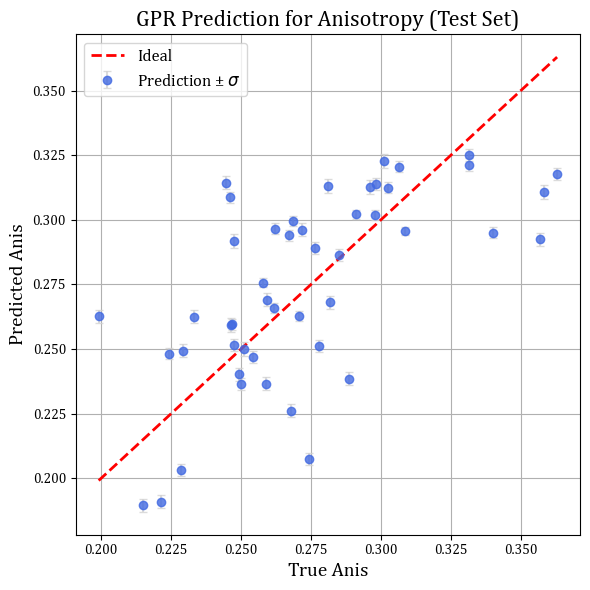

In [19]:
#Apply trained model on Test dataset!
# ---------- Predict with standard deviation ----------
X_test = df_test[features]
X_test_scaled = scaler.transform(X_test)
y_test = df_test[target].values
y_pred_test, y_std_test = gpr_anis.predict(X_test_scaled, return_std=True)

# Ensure everything is numpy array
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)
y_std_test = np.asarray(y_std_test)

# ---------- Plot with confidence intervals ----------
plt.figure(figsize=(6, 6))
plt.errorbar(
    y_test, y_pred_test, yerr=y_std_test**0.7,
    fmt='o', color='royalblue', ecolor='lightgray', elinewidth=1.5, capsize=3,
    alpha=0.8, label=r"Prediction ± $\sigma$"
)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2, label="Ideal")

plt.xlabel(r"True Anis", fontsize=14)
plt.ylabel(r"Predicted Anis", fontsize=14)
plt.title(r"GPR Prediction for Anisotropy (Test Set)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Acylindricity (Matern kernel with Lengthscale = 3.911111 and Nu = 0.25)

In [20]:
# Define the parameter values
length_scale =3.911111
alpha = 0.25

# ---------- Features ----------
features = ['Comp', 'BID', 'UMAP_0', 'UMAP_1']
X_train = df_train[features]
X_val = df_val[features]

# ---------- Scaling ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# ---------- Targets ----------
target = "acyl_mean"
y_train = df_train[target].values
y_val = df_val[target].values

# Store results
results = []

# Kernel definition
kernel = Matern(length_scale=length_scale, nu=nu, length_scale_bounds=(1e-3, 1e3))
gpr_acyl = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=20)

gpr_acyl.fit(X_train_scaled, y_train)
y_pred_val = gpr_acyl.predict(X_val_scaled)
mse = mean_squared_error(y_val, y_pred_val)

results.append({
    "Length_scale": length_scale,
    "Alpha": alpha,
    "MSE": mse
})
print(gpr_acyl.kernel_)
# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


Matern(length_scale=0.874, nu=0.25)
   Length_scale  Alpha        MSE
0      3.911111   0.25  24.618971


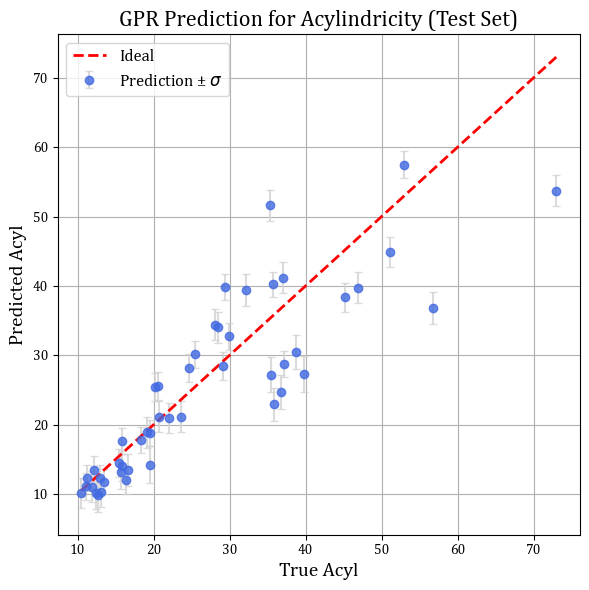

In [116]:
#Apply trained model on Test dataset!
# ---------- Predict with standard deviation ----------
X_test = df_test[features]
X_test_scaled = scaler.transform(X_test)
y_test = df_test[target].values
y_pred_test, y_std_test = gpr_acyl.predict(X_test_scaled, return_std=True)

# Ensure everything is numpy array
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)
y_std_test = np.asarray(y_std_test)

# ---------- Plot with confidence intervals ----------
plt.figure(figsize=(6, 6))
plt.errorbar(
    y_test, y_pred_test, yerr=y_std_test*3,
    fmt='o', color='royalblue', ecolor='lightgray', elinewidth=1.5, capsize=3,
    alpha=0.8, label=r"Prediction ± $\sigma$"
)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2, label="Ideal")

plt.xlabel(r"True Acyl", fontsize=14)
plt.ylabel(r"Predicted Acyl", fontsize=14)
plt.title(r"GPR Prediction for Acylindricity (Test Set)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

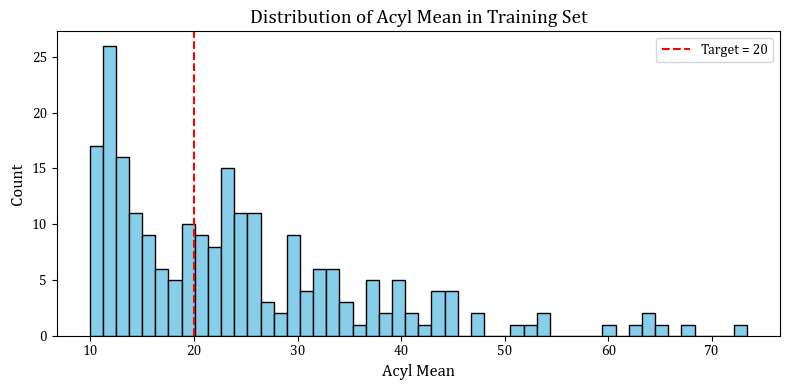

In [117]:
plt.figure(figsize=(8, 4))
plt.hist(df_train["acyl_mean"], bins=50, color='skyblue', edgecolor='k')
plt.axvline(20, color='red', linestyle='--', label='Target = 20')
plt.xlabel("Acyl Mean", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Acyl Mean in Training Set", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


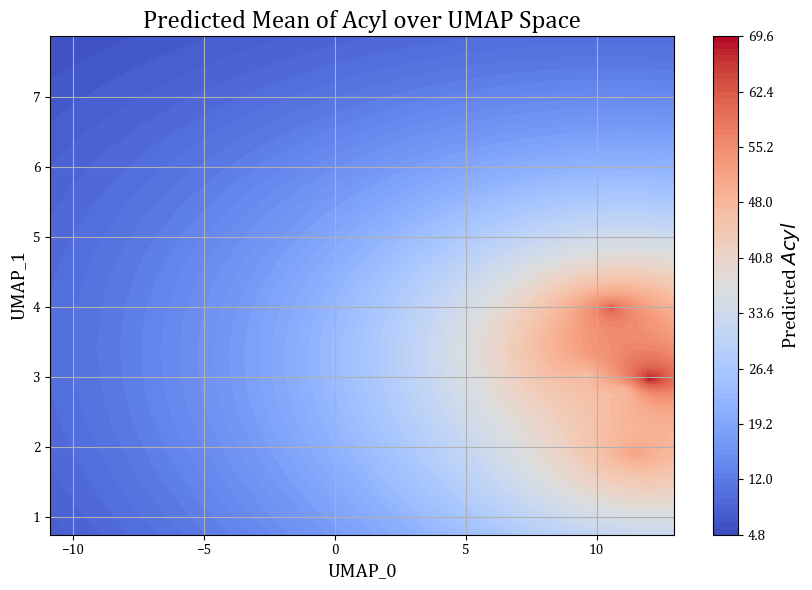

In [118]:
# Predict using trained model
acyl_pred, acyl_std = gpr_acyl.predict(X_grid_scaled, return_std=True)

# Reshape for plotting
acyl_pred_grid = acyl_pred.reshape(U0.shape)

# Plot predicted mean
plt.figure(figsize=(8.5, 6))
contour = plt.contourf(U0, U1, acyl_pred_grid, levels=100, cmap='coolwarm')
cbar = plt.colorbar(contour)
cbar.set_label(r"Predicted $Acyl$", fontsize=14)

plt.xlabel("UMAP_0", fontsize=14)
plt.ylabel("UMAP_1", fontsize=14)
plt.title("Predicted Mean of Acyl over UMAP Space", fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()


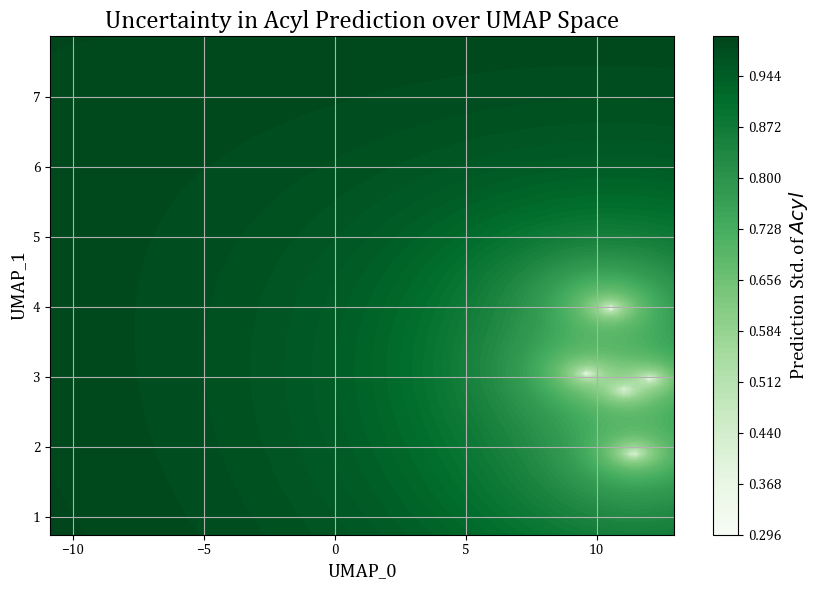

In [119]:
acyl_std_grid = acyl_std.reshape(U0.shape)

plt.figure(figsize=(8.5, 6))
contour = plt.contourf(U0, U1, acyl_std_grid, levels=100, cmap='Greens')
cbar = plt.colorbar(contour)
cbar.set_label(r"Prediction Std. of $Acyl$", fontsize=14)

plt.xlabel("UMAP_0", fontsize=14)
plt.ylabel("UMAP_1", fontsize=14)
plt.title("Uncertainty in Acyl Prediction over UMAP Space", fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\pt3594\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


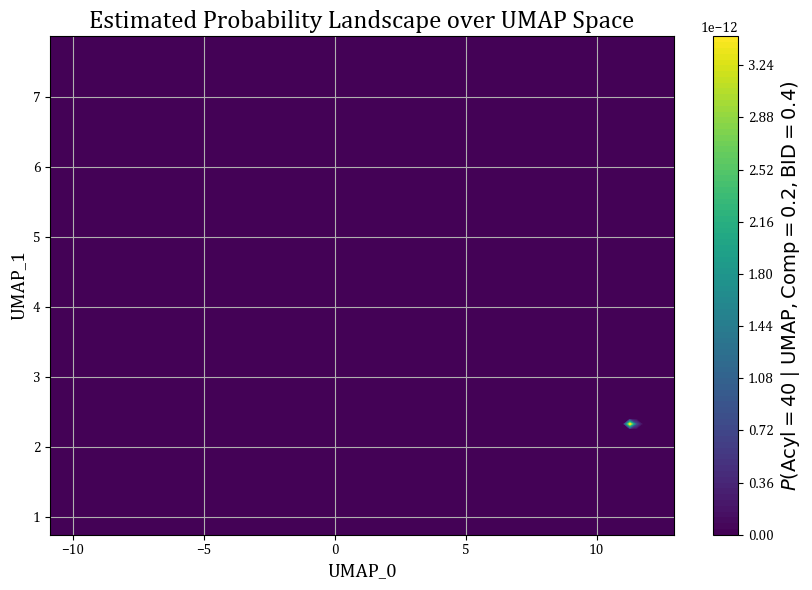

In [125]:
from scipy.stats import norm

# Grid over UMAP space
umap0_vals = np.linspace(Data['UMAP_0'].min(), Data['UMAP_0'].max(), 100)
umap1_vals = np.linspace(Data['UMAP_1'].min(), Data['UMAP_1'].max(), 100)
U0, U1 = np.meshgrid(umap0_vals, umap1_vals)

# Flatten for prediction
U0_flat = U0.ravel()
U1_flat = U1.ravel()

# Fixed Comp and BID
comp = 0.2
bid = 0.4

# Input matrix: shape (n_points, 4)
X_grid = np.column_stack([np.full_like(U0_flat, comp),
                          np.full_like(U0_flat, bid),
                          U0_flat,
                          U1_flat])

# Scale features
X_grid_scaled = scaler.transform(X_grid)

# Predict using trained model
acyl_pred, acyl_std = gpr_acyl.predict(X_grid_scaled, return_std=True)

# Compute probability density for Acyl = 20
p_acyl20 = norm.pdf(40, loc=acyl_pred, scale=acyl_std)

# Reshape back to grid
P_grid = p_acyl20.reshape(U0.shape)

# ---------- Plot ----------
plt.figure(figsize=(8.5, 6))
contour = plt.contourf(U0, U1, P_grid, levels=100, cmap='viridis')
cbar = plt.colorbar(contour)
cbar.set_label(r"$P(\mathrm{Acyl} = 40 \mid \mathrm{UMAP}, \mathrm{Comp}=0.2, \mathrm{BID}=0.4)$", fontsize=14)
plt.xlabel("UMAP_0", fontsize=14)
plt.ylabel("UMAP_1", fontsize=14)
plt.title("Estimated Probability Landscape over UMAP Space", fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\pt3594\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


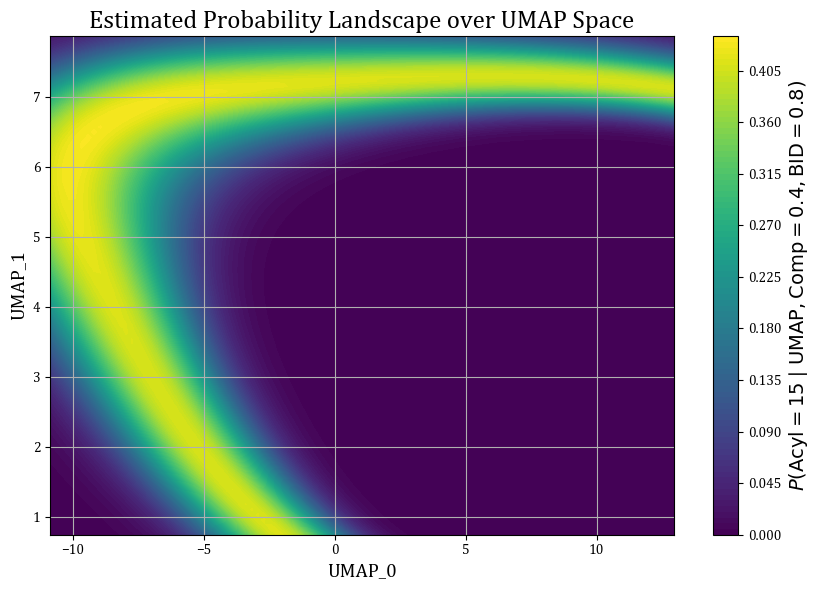

In [126]:
from scipy.stats import norm

# Grid over UMAP space
umap0_vals = np.linspace(Data['UMAP_0'].min(), Data['UMAP_0'].max(), 100)
umap1_vals = np.linspace(Data['UMAP_1'].min(), Data['UMAP_1'].max(), 100)
U0, U1 = np.meshgrid(umap0_vals, umap1_vals)

# Flatten for prediction
U0_flat = U0.ravel()
U1_flat = U1.ravel()

# Fixed Comp and BID
comp = 0.4
bid = 0.8

# Input matrix: shape (n_points, 4)
X_grid = np.column_stack([np.full_like(U0_flat, comp),
                          np.full_like(U0_flat, bid),
                          U0_flat,
                          U1_flat])

# Scale features
X_grid_scaled = scaler.transform(X_grid)

# Predict using trained model
acyl_pred, acyl_std = gpr_acyl.predict(X_grid_scaled, return_std=True)

# Compute probability density for Acyl = 20
p_acyl20 = norm.pdf(10, loc=acyl_pred, scale=acyl_std)

# Reshape back to grid
P_grid = p_acyl20.reshape(U0.shape)

# ---------- Plot ----------
plt.figure(figsize=(8.5, 6))
contour = plt.contourf(U0, U1, P_grid, levels=100, cmap='viridis')
cbar = plt.colorbar(contour)
cbar.set_label(r"$P(\mathrm{Acyl} = 15 \mid \mathrm{UMAP}, \mathrm{Comp}=0.4, \mathrm{BID}=0.8)$", fontsize=14)
plt.xlabel("UMAP_0", fontsize=14)
plt.ylabel("UMAP_1", fontsize=14)
plt.title("Estimated Probability Landscape over UMAP Space", fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()


Asphericity (Matern kernel with lengthscale = 2.822222 and nu = 0.25)

In [21]:
# Define the parameter values
length_scale = 2.822222
nu = 0.250000

# ---------- Features ----------
features = ['Comp', 'BID', 'UMAP_0', 'UMAP_1']
X_train = df_train[features]
X_val = df_val[features]

# ---------- Scaling ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# ---------- Targets ----------
target = "asph_mean"
y_train = df_train[target].values
y_val = df_val[target].values

# Store results
results = []

# Kernel definition
kernel = Matern(length_scale=length_scale, nu=nu, length_scale_bounds=(1e-3, 1e3))
gpr_asph = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=20)

gpr_asph.fit(X_train_scaled, y_train)
y_pred_val = gpr_asph.predict(X_val_scaled)
mse = mean_squared_error(y_val, y_pred_val)

results.append({
    "Length_scale": length_scale,
    "Nu": nu,
    "MSE": mse
})
print(gpr_asph.kernel_)

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


Matern(length_scale=0.762, nu=0.25)
   Length_scale    Nu         MSE
0      2.822222  0.25  177.874228


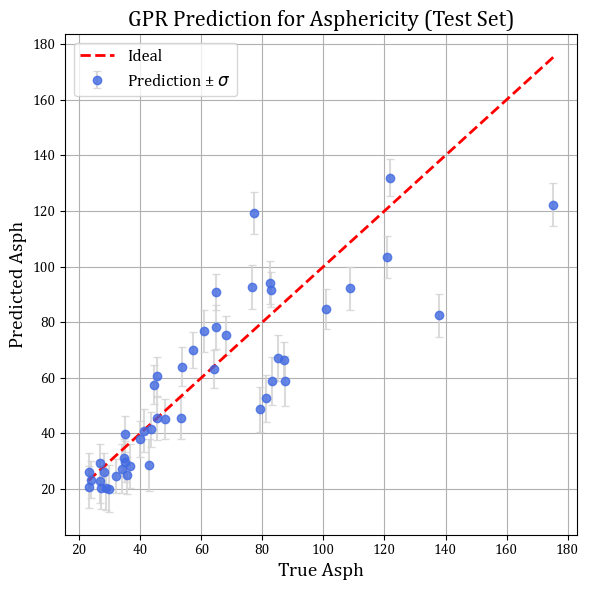

In [129]:
#Apply trained model on Test dataset!
# ---------- Predict with standard deviation ----------
X_test = df_test[features]
X_test_scaled = scaler.transform(X_test)
y_test = df_test[target].values
y_pred_test, y_std_test = gpr_asph.predict(X_test_scaled, return_std=True)

# Ensure everything is numpy array
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)
y_std_test = np.asarray(y_std_test)

# ---------- Plot with confidence intervals ----------
plt.figure(figsize=(6, 6))
plt.errorbar(
    y_test, y_pred_test, yerr=y_std_test*10,
    fmt='o', color='royalblue', ecolor='lightgray', elinewidth=1.5, capsize=3,
    alpha=0.8, label=r"Prediction ± $\sigma$"
)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2, label="Ideal")

plt.xlabel(r"True Asph", fontsize=14)
plt.ylabel(r"Predicted Asph", fontsize=14)
plt.title(r"GPR Prediction for Asphericity (Test Set)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\pt3594\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


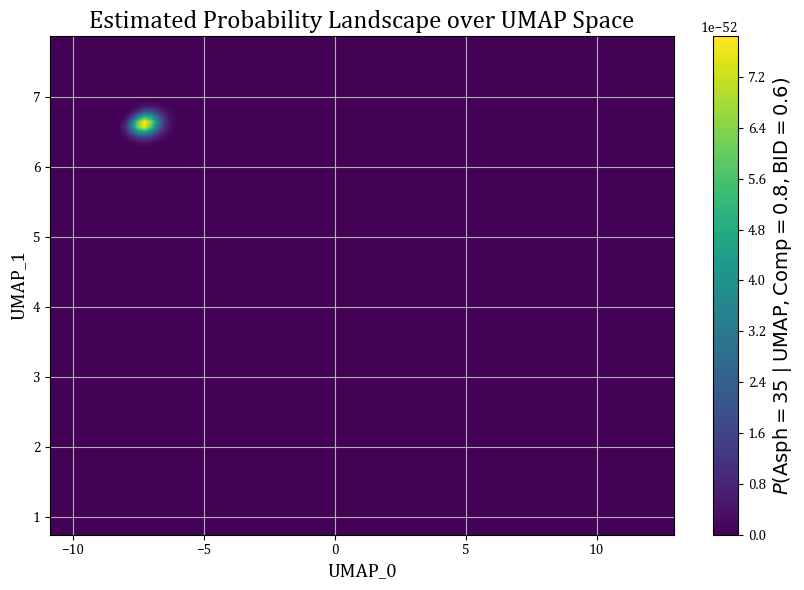

In [139]:
from scipy.stats import norm

# Grid over UMAP space
umap0_vals = np.linspace(Data['UMAP_0'].min(), Data['UMAP_0'].max(), 100)
umap1_vals = np.linspace(Data['UMAP_1'].min(), Data['UMAP_1'].max(), 100)
U0, U1 = np.meshgrid(umap0_vals, umap1_vals)

# Flatten for prediction
U0_flat = U0.ravel()
U1_flat = U1.ravel()

# Fixed Comp and BID
comp = 0.8
bid = 0.6

# Input matrix: shape (n_points, 4)
X_grid = np.column_stack([np.full_like(U0_flat, comp),
                          np.full_like(U0_flat, bid),
                          U0_flat,
                          U1_flat])

# Scale features
X_grid_scaled = scaler.transform(X_grid)

# Predict using trained model
asph_pred, asph_std = gpr_asph.predict(X_grid_scaled, return_std=True)

# Compute probability density for Acyl = 20
p_asph20 = norm.pdf(35, loc=asph_pred, scale=asph_std)

# Reshape back to grid
P_grid = p_asph20.reshape(U0.shape)

# ---------- Plot ----------
plt.figure(figsize=(8.5, 6))
contour = plt.contourf(U0, U1, P_grid, levels=100, cmap='viridis')
cbar = plt.colorbar(contour)
cbar.set_label(r"$P(\mathrm{Asph} = 35 \mid \mathrm{UMAP}, \mathrm{Comp}=0.8, \mathrm{BID}=0.6)$", fontsize=14)
plt.xlabel("UMAP_0", fontsize=14)
plt.ylabel("UMAP_1", fontsize=14)
plt.title("Estimated Probability Landscape over UMAP Space", fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()
